Reward Matrix:
 [[ -1. -10.  -1. -10.  -1.  -1.  -1. -10.  -1.  -1.]
 [ -1. -10.  -1.  -1.  -1. -10.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1. -10.  -1.  -1. -10.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1. -10.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1. -10.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1. -10. -10. -10.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. -10.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


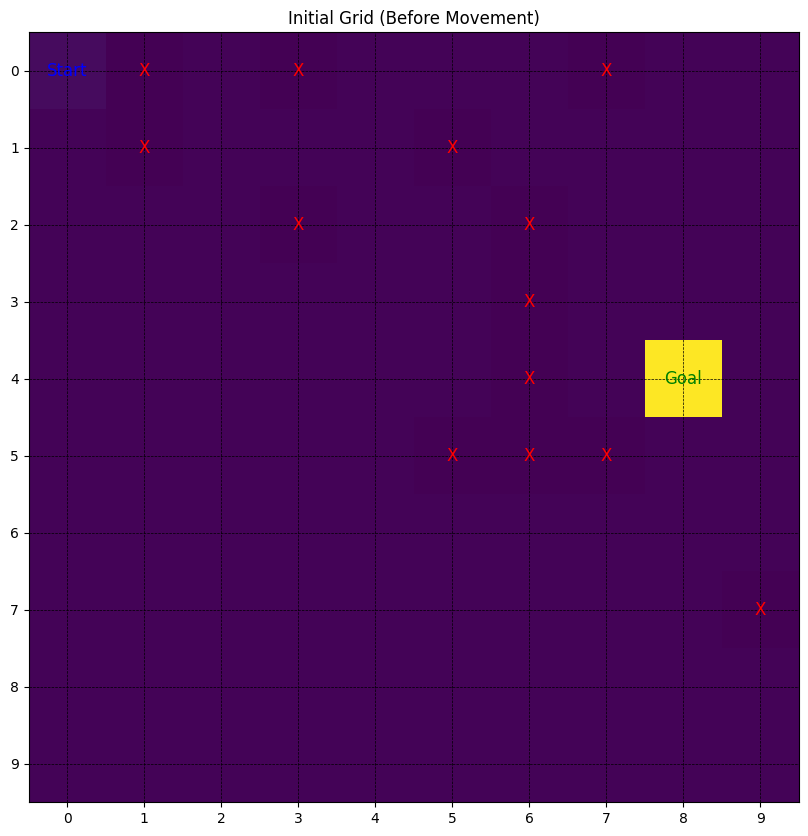

Optimal Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (5, 8), (4, 8)]


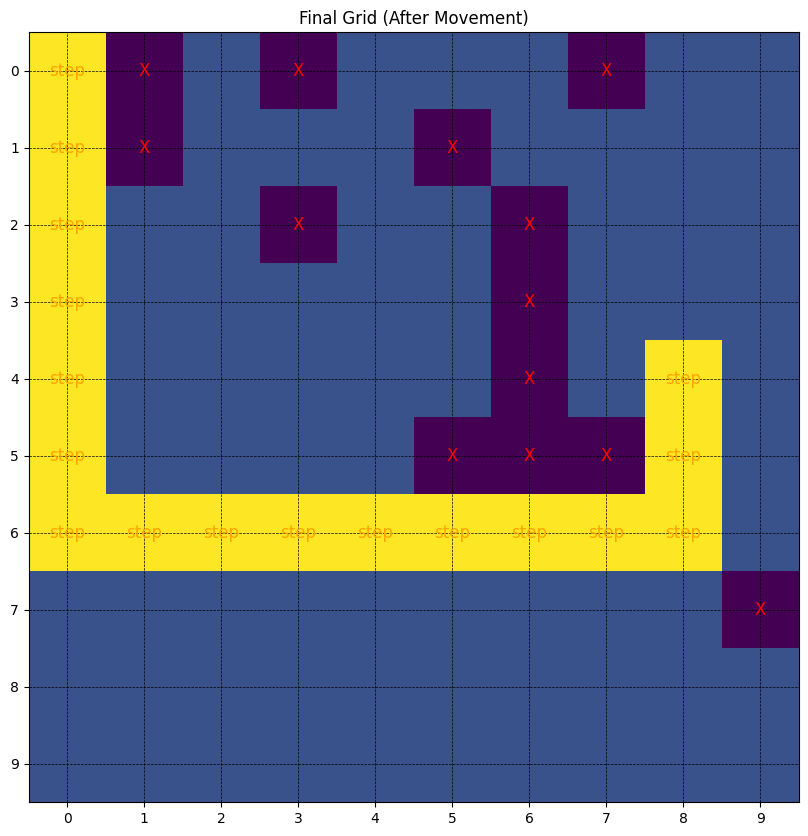

In [9]:

import numpy as np
import matplotlib.pyplot as plt

# Define the environment
rows, cols = 10, 10
blocked_locations = [(0,1),(0,3),(1, 1), (1,5), (2, 3), (5,5),(5,6),(5,7), (7,9), (0,7), (4,6), (2,6), (3,6)]
starting_location = (0, 0)
ending_location = (4, 8)
goal_coordinates = (4, 8)
blocked_penalty = 10
penalty_for_moving = True
goal_reward = 100
epochs = 1000
gamma = 0.75
alpha = 0.9

# Define actions
actions = ["up", "down", "left", "right"]


# Function to visualize the grid before the agent moves
def visualize_initial_grid(starting_location, ending_location, blocked_locations, rows, cols):
    # Create a grid representation
    grid = np.zeros((rows, cols))

    # Mark blocked locations
    for x, y in blocked_locations:
        grid[x, y] = -1

    # Mark the starting location
    grid[starting_location] = 2

    # Mark the goal location
    grid[ending_location] = 100

    # Plot the grid
    plt.figure(figsize=(rows, cols))
    plt.imshow(grid, cmap="viridis", origin="upper")

    # Add annotations
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == -1:
                plt.text(j, i, "X", ha="center", va="center", color="red", fontsize=12)
            elif grid[i, j] == 100:
                plt.text(j, i, "Goal", ha="center", va="center", color="green", fontsize=12)
            elif grid[i, j] == 2:
                plt.text(j, i, "Start", ha="center", va="center", color="blue", fontsize=12)

    plt.title("Initial Grid (Before Movement)")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color="black", linestyle="--", linewidth=0.5)
    plt.show()

# Function to visualize the grid after the agent moves
def visualize_final_grid(optimal_path, starting_location, ending_location, blocked_locations, rows, cols):
    # Create a grid representation
    grid = np.zeros((rows, cols))

    # Mark blocked locations
    for x, y in blocked_locations:
        grid[x, y] = -1

    # Mark the starting location
    grid[starting_location] = 2

    # Mark the goal location
    grid[ending_location] = 100

    # Mark the optimal path
    for x, y in optimal_path:
        grid[x, y] = 3  # Use a unique value for the path

    # Plot the grid
    plt.figure(figsize=(rows, cols))
    plt.imshow(grid, cmap="viridis", origin="upper")

    # Add annotations
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == -1:
                plt.text(j, i, "X", ha="center", va="center", color="red", fontsize=12)
            elif grid[i, j] == 100:
                plt.text(j, i, "Goal", ha="center", va="center", color="green", fontsize=12)
            elif grid[i, j] == 2:
                plt.text(j, i, "Start", ha="center", va="center", color="blue", fontsize=12)
            elif grid[i, j] == 3:
                plt.text(j, i, "step", ha="center", va="center", color="orange", fontsize=12)

    plt.title("Final Grid (After Movement)")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color="black", linestyle="--", linewidth=0.5)
    plt.show()

# Function to customize the reward matrix
def customize_reward_matrix(rows, cols, blocked_locations, blocked_penalty=10, penalty_for_moving=True, goal_coordinates=(4, 4), goal_reward=100):
    # Define the reward matrix
    if penalty_for_moving:
        R = np.zeros([rows, cols]) - 1  # Default reward for each step is negative
    else:
        R = np.zeros([rows, cols])  # No penalty for moving

    # Mark the goal location
    x, y = goal_coordinates
    R[x, y] = goal_reward

    # Mark blocked locations
    for x, y in blocked_locations:
        R[x, y] = -blocked_penalty

    print("Reward Matrix:\n", R)
    return R


# Customize the reward matrix
R = customize_reward_matrix(rows, cols, blocked_locations, blocked_penalty, penalty_for_moving, goal_coordinates, goal_reward)

# Define states
def define_2d_states(rows, cols):
    states = []
    for i in range(rows):
        for j in range(cols):
            states.append((i, j))
    return states

states = define_2d_states(rows, cols)
states = [state for state in states if state not in blocked_locations]

# Function to make an action
def make_action(action, states, location):
    x, y = location
    if action == "up":
        new_x, new_y = x - 1, y
    elif action == "down":
        new_x, new_y = x + 1, y
    elif action == "left":
        new_x, new_y = x, y - 1
    elif action == "right":
        new_x, new_y = x, y + 1

    if (new_x, new_y) in states:
        return (new_x, new_y)
    else:
        return (x, y)

# Train the Q-table
def train(epochs, rows, cols, actions, starting_location, ending_location, states, R, gamma, alpha):
    # Map actions to indices
    action_to_index = {action: index for index, action in enumerate(actions)}
    index_to_action = {index: action for action, index in action_to_index.items()}

    # Initialize the Q-table
    Q = np.zeros((rows, cols, len(actions)))

    # Q-Learning loop
    for episode in range(epochs):
        current_state = starting_location
        while current_state != ending_location:
            # Choose a random action
            action = np.random.choice(actions)
            action_index = action_to_index[action]

            # Get the next state
            next_state = make_action(action, states, current_state)

            # Get the reward for the next state
            reward = R[next_state]

            # Calculate current Q value
            current_Q_value = Q[current_state[0], current_state[1], action_index]

            # Calculate the maximum Q value for the next state
            max_next_Q_value = np.max(Q[next_state[0], next_state[1], :])

            # Calculate Temporal Difference (TD)
            TD = reward + gamma * max_next_Q_value - current_Q_value

            # Update the Q matrix
            Q[current_state[0], current_state[1], action_index] += alpha * TD

            # Move to the next state
            current_state = next_state

    return Q, index_to_action

# Function to get the optimal path
def get_optimal_path(starting_location, ending_location, Q, index_to_action):
    current_state = starting_location
    optimal_route = [starting_location]
    while current_state != ending_location:
        action_index = np.argmax(Q[current_state[0], current_state[1], :])
        action = index_to_action[action_index]
        next_state = make_action(action, states, current_state)
        optimal_route.append(next_state)
        current_state = next_state
    return optimal_route

# Train the Q-table and get the optimal path
# Visualize the initial grid
visualize_initial_grid(starting_location, ending_location, blocked_locations, rows, cols)

# Train the Q-table
Q, index_to_action = train(epochs, rows, cols, actions, starting_location, ending_location, states, R, gamma, alpha)

# Get the optimal path
optimal_path = get_optimal_path(starting_location, ending_location, Q, index_to_action)
print(f"Optimal Path: {optimal_path}")

# Visualize the final grid
visualize_final_grid(optimal_path, starting_location, ending_location, blocked_locations, rows, cols)